<div class="text_cell_render border-box-sizing rendered_html">
<p style="text-align:center; height: 20px; color:black; font-weight: bold; font-size: 15px; ">Igor Vaz</p>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<h1 id="California Housing Prices" align="middle">California Housing Prices<a class="anchor-link" href="#California Housing Prices" target="_self"></a></h1><hr>
</div>

<a>
    <div style="margin: 10px;">
        <p align="left">
            <img width="100%" align="left" style="margin-right: 40px;" src="./images/opening.png"/>           
        </p>
    </div>
</a>



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#California Housing Prices" data-toc-modified-id="California-Housing-Prices-1">California Housing Prices</a></span><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1.1">1. Introduction</a></span></li><li><span><a href="#2.-Exploratory-Data-Analysis" data-toc-modified-id="2.-Exploratory-Data-Analysis-1.2">2. Exploratory Data Analysis</a></span></li><li><span><a href="#3.-Visualizing" data-toc-modified-id="3.-Visualizing-1.3">3. Visualizing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plotting-the-Longitude-and-Latitude-of-each-instance,-with-population-density-and-price-of-the-house" data-toc-modified-id="Plotting-the-Longitude-and-Latitude-of-each-instance,-with-population-density-and-price-of-the-house-1.3.0.1">Plotting the Longitude and Latitude of each instance, with population density and price of the house</a></span></li><li><span><a href="#Looking-for-Correlations" data-toc-modified-id="Looking-for-Correlations-1.3.0.2">Looking for Correlations</a></span></li></ul></li></ul></li><li><span><a href="#4.-Combining-attributes" data-toc-modified-id="4.-Combining-attributes-1.4">4. Combining attributes</a></span></li><li><span><a href="#5.-Modeling" data-toc-modified-id="5.-Modeling-1.5">5. Modeling</a></span><ul class="toc-item"><li><span><a href="#5.1-Artificial-Neural-Network" data-toc-modified-id="5.1-Artificial-Neural-Network-1.5.1">5.1 Artificial Neural Network</a></span></li><li><span><a href="#5.2-Linear-Regression" data-toc-modified-id="5.2-Linear-Regression-1.5.2">5.2 Linear Regression</a></span></li><li><span><a href="#5.3-Polynomial-Regression" data-toc-modified-id="5.3-Polynomial-Regression-1.5.3">5.3 Polynomial Regression</a></span></li><li><span><a href="#5.4-Decision-Tree" data-toc-modified-id="5.4-Decision-Tree-1.5.4">5.4 Decision Tree</a></span></li><li><span><a href="#5.5-Random-Forest" data-toc-modified-id="5.5-Random-Forest-1.5.5">5.5 Random Forest</a></span></li><li><span><a href="#5.6-SVR" data-toc-modified-id="5.6-SVR-1.5.6">5.6 SVR</a></span></li></ul></li><li><span><a href="#6.-Models-Comparison" data-toc-modified-id="6.-Models-Comparison-1.6">6. Models Comparison</a></span></li></ul></li></ul></div>

## 1. Introduction

This dataset contains data from a 1990 census date in a California disctrict. By looking at Fig 1, it's reasonable to the inflation pattern on the prices over the years.

<a href="https://lao.ca.gov/reports/2015/finance/housing-costs/housing-costs.aspx" target="_blank">
    <div style="margin: 40px;">
        <p align="left">
            <img width="60%" align="middle" src="./images/prices_over_years.png"/>
            <h5 align="center">Figure 1 - California Houses Prices over the years</h5>
        </p>
    </div>
</a>

To start the analysis, first it's necessary to import the dataset and take a better look at its attributes.

## 2. Exploratory Data Analysis

In [57]:
#Importing main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf; 
print(tf.__version__)

from tensorflow import keras
from tensorflow.keras import layers

2.0.0-alpha0


In [58]:
#Importing dataset which is present at this notebook's directory
dataset = pd.read_csv('california_housing.csv')
dataset_original = dataset.copy()
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


As we can see, the dataset have only one categorical feature (ocean_proximity), so let's take a better look at it:

In [59]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

As most Machine Learning algorithms don't work well with text labels, we should convert these to numbers

In [60]:
#Importing OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder
categorical_encoder = OneHotEncoder(sparse=False)
dataset_categorical_ohe = categorical_encoder.fit_transform(dataset[['ocean_proximity']])
dataset_categorical_ohe

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [61]:
categorical_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

converting the numpy array to a dataframe:

In [62]:
dataset_categorical_ohe = pd.DataFrame(data=dataset_categorical_ohe, index= None , columns=categorical_encoder.categories_)
dataset_categorical_ohe.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


We should also drop one of these columns now to avoid the dummy variable trap, so let's drop the 'ISLAND' column:

In [63]:
dataset_categorical_ohe.drop(['ISLAND'],axis=1, inplace = True)

In [64]:
dataset_categorical_ohe.head()

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


Now we can append this back to the original dataset and move on:

In [65]:
#Removing the categorical column
dataset = dataset.iloc[:,:-1]

#adding the one-hot-encoded columns
dataset = pd.concat([dataset, dataset_categorical_ohe], axis=1);
#renaming ocean proximity labels
dataset.columns = [str(s) for s in dataset.columns]
dataset.rename(index=str, columns = {"('<1H OCEAN',)": '<1H OCEAN', "('INLAND',)": "INLAND","('NEAR BAY',)": "NEAR BAY","('NEAR OCEAN',)": "NEAR OCEAN"}, inplace = True)

dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


Another useful analysis is to verify if there is any column with data missing:

In [66]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

A good way to take care of those missing values is by replacing them with them median from that feature:

In [67]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(dataset)

#Transform the dataset:
dataset_without_missing_values = imputer.transform(dataset)

dataset = pd.DataFrame(dataset_without_missing_values, columns=dataset.columns, index = list(dataset.index.values))
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


In [68]:
#verifying if it worked
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [69]:
#main statistics from attributes
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,536.838857,419.391878,1.0000,297.0000,435.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
<1H OCEAN,20640.0,0.442636,0.496710,0.0000,0.0000,0.0000,1.00000,1.0000


## 3. Visualizing
Let's make some plots to help understand our data better

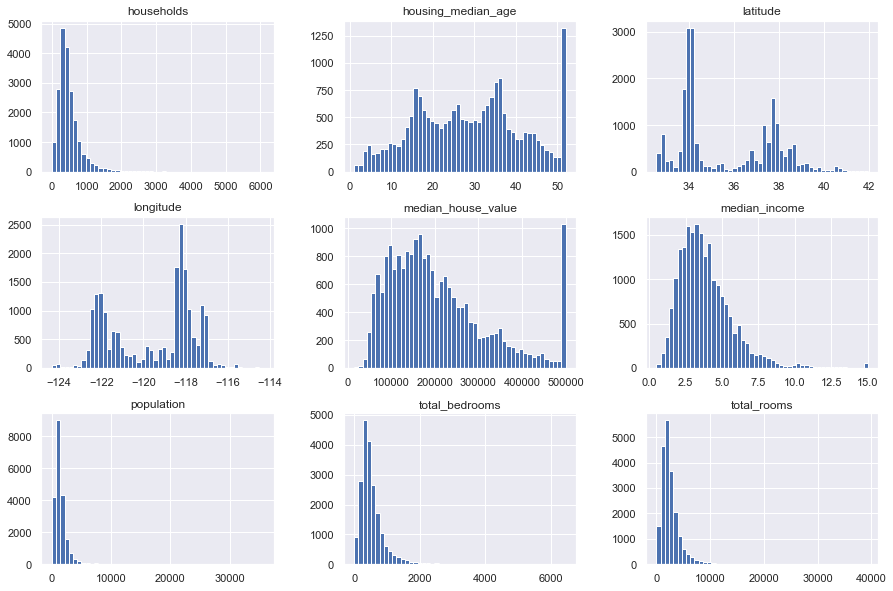

In [70]:
dataset_original.hist(bins=50, figsize=(15,10))
plt.show();

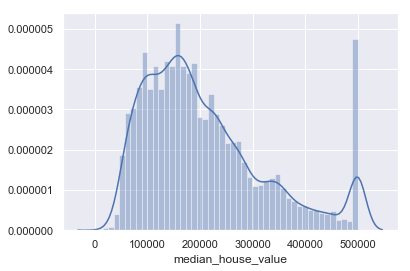

In [71]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.distplot(dataset['median_house_value'])
plt.show()

There is a strange pattern in the price frequency around 500000, which could be wrong data, so we can smooth it:

In [72]:
dataset[dataset['median_house_value']>490000]['median_house_value'].value_counts().head()

500001.0    965
500000.0     27
495500.0      3
492500.0      2
491200.0      2
Name: median_house_value, dtype: int64

So we're going to remove values above 500000

In [73]:
dataset=dataset.loc[dataset['median_house_value']<=500000,:]

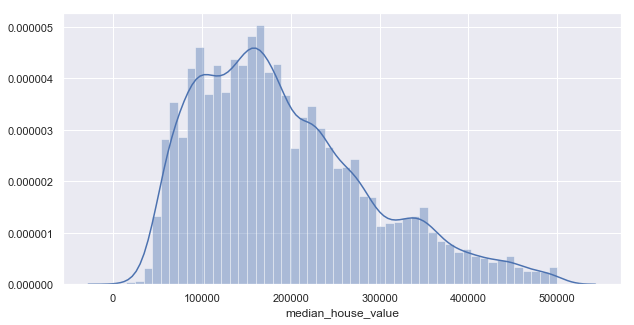

In [74]:
plt.figure(figsize=(10,5))
sns.distplot(dataset['median_house_value'])
plt.show()

#### Plotting the Longitude and Latitude of each instance, with population density and price of the house

Each circle radius represents the district’s population (option s), and the color of each circle represents the price (option c). The color map 'jet' makes the lowest values appear as blue and the highest values red. We can see that there is a tendency of the prices to be higher near the ocean

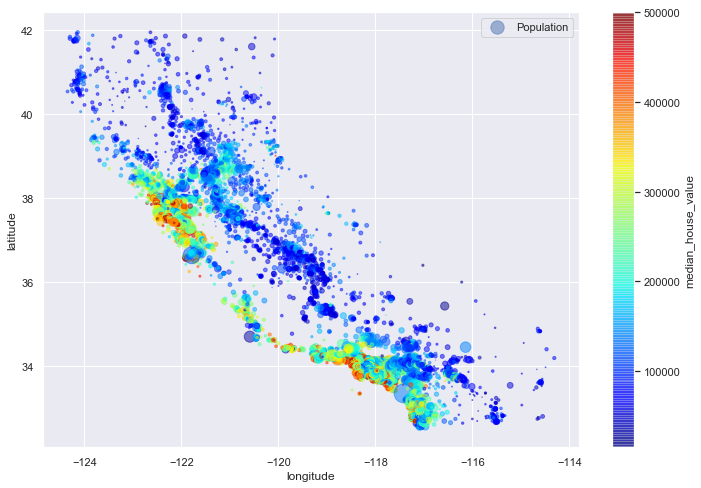

In [75]:
#plotting the latitude and longitude of each instance  with population density and price of the house
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5, s=dataset["population"]/100, label="Population",
             figsize=(12,8), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend();

#### Looking for Correlations
We are going to predict the values of the houses in this model, so we can start by looking how the other attributes correlates with our label

In [76]:
corr_matrix = dataset.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.642611
<1H OCEAN             0.284524
NEAR BAY              0.157077
total_rooms           0.143139
NEAR OCEAN            0.135889
households            0.094894
total_bedrooms        0.074178
housing_median_age    0.067948
population            0.011964
longitude            -0.046658
latitude             -0.148289
INLAND               -0.499008
Name: median_house_value, dtype: float64

The most promising attributes to be correlated with "median_house_value" are: "median_income", "total_rooms", "households", so we can plot a scatter matrix to take a better look:

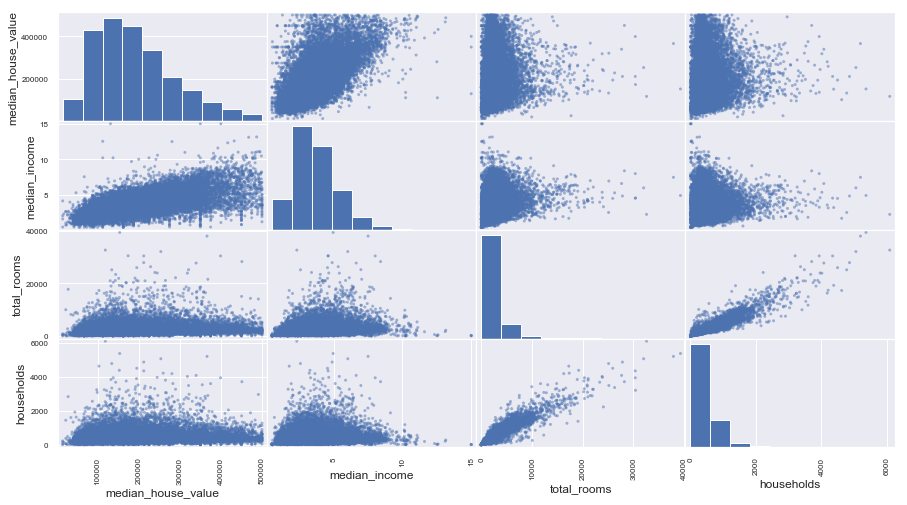

In [77]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset[["median_house_value", "median_income", "total_rooms", "households"]], figsize=(15, 8));

## 4. Combining attributes
We can transform some attributes so they can become more relevant to our analysis:

* the total number of rooms in a district is not very useful if you don’t know how many households there are, so it's more       interesting to have the **number of rooms per household**.

* The same goes for the total number of bedrooms, that by itself is not very useful, so we can compare it to the number of  rooms.

* Another one we can create is the **population per household**

In [78]:
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"]
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["population_per_household"]=dataset["population"]/dataset["households"]
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0,6.281853,0.172096,2.181467


Let's see the correlation one more time:

In [79]:
corr_matrix = dataset.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.642611
<1H OCEAN                   0.284524
NEAR BAY                    0.157077
total_rooms                 0.143139
NEAR OCEAN                  0.135889
rooms_per_household         0.109673
households                  0.094894
total_bedrooms              0.074178
housing_median_age          0.067948
population                  0.011964
population_per_household   -0.021465
longitude                  -0.046658
latitude                   -0.148289
bedrooms_per_room          -0.196226
INLAND                     -0.499008
Name: median_house_value, dtype: float64

With that we can see that our news attributes combinations have a higher correlation than their precessors

## 5. Modeling

Let's try the following algorithms:
* Artificial Neural Network
* Linear Regression
* Polynomial Regression
* Decision Tree
* Random Forest
* SVR

At each algorithm, the evaluation a metric is the **Mean Absolute Error**, which is metric that provides an indication of the goodness of a model prediction.
A Comparison table is showed at the end. The other metrics such as **Mean Squared Error** and $R^{2}$ score can be easilly applied too.

**Splitting the dataset into training set and test set**

In [80]:
#first we separate our labels from our attributes
X = dataset.drop('median_house_value', axis=1).values
y = dataset['median_house_value'].values

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5.1 Artificial Neural Network

In [27]:
X_train.shape[1]

15

Here, we'll use a Sequential model with three densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model().

In [28]:
def build_model():
    model = keras.Sequential([
        layers.Dense(15, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
        ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
            optimizer=optimizer,
              metrics=['mae', 'mse'])
    return model

model = build_model()

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,489
Trainable params: 5,489
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 120

history = model.fit(X_train, y_train, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................

In [56]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
print("Real values:\n")
print(y_train[:10])

print("\nPredicted values")
print(example_result)

Real values:

[206700. 187300. 344200. 203400. 326100. 230000. 183900. 260900. 106300.
 167700.]

Predicted values
[[234644.81]
 [212001.88]
 [346138.3 ]
 [241591.62]
 [309030.  ]
 [222290.75]
 [238150.02]
 [220276.31]
 [ 92648.54]
 [186077.44]]


It seems to be working, and it produces a result of the expected shape and type.
Next, the model is trained for 120 epochs, and record the training and validation accuracy in the history object.

Visualize the model's training progress using the stats stored in the history object.

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
115,3.445793e+09,41638.703125,3.445791e+09,3.194928e+09,40530.109375,3.194928e+09,115
116,3.442217e+09,41585.644531,3.442219e+09,3.201734e+09,41301.210938,3.201735e+09,116
117,3.440559e+09,41610.011719,3.440559e+09,3.187424e+09,40603.917969,3.187424e+09,117
118,3.436690e+09,41540.503906,3.436691e+09,3.188531e+09,40971.851562,3.188530e+09,118
119,3.435319e+09,41542.863281,3.435320e+09,3.181332e+09,40602.308594,3.181332e+09,119


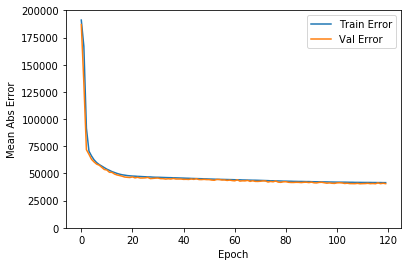

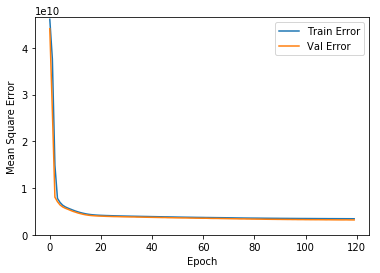

In [34]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,4.652931e+10])
  plt.legend()
  plt.show()


plot_history(history)

Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.

In [35]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Neg Mean Abs Error: {:5.2f}".format(-1*mae))
print("Testing set Root Mean Sqr Error: {:5.2f}".format(mse**(1/2)))

Testing set Neg Mean Abs Error: -41743.80
Testing set Root Mean Sqr Error: 59550.87


Finally, predict House price values using data in the testing set:

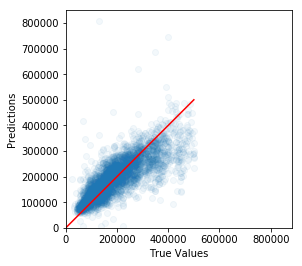

In [36]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions, alpha = 0.05)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-500000, 500000], [-500000, 500000], color='r')

It looks like our model predicts reasonably well. Let's take a look at the error distribution.

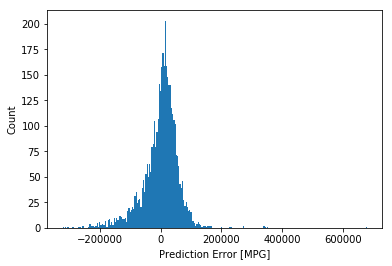

In [37]:
error = test_predictions - y_test
plt.hist(error, bins = 250)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

we have a gaussian curve for the prediction errors, as expected.

### 5.2 Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [39]:
#Fitting linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicting the test set results
y_pred = regressor.predict(X_test)

In [40]:
#Performing Cross Validation Scoring
cross_val_lr = cross_val_score(cv = 10, X = X_train, y = y_train, estimator = regressor, scoring = 'neg_mean_absolute_error')
r2_lr = cross_val_lr.mean()
std_lr = cross_val_lr.std()
print('Neg Mean Absolute Error: ' + str(r2_lr))

Neg Mean Absolute Error: -44335.47347786224


**Taking only the 'median_income' in consideration (highest correlation)**

Neg Mean Absolute Error: -56696.9638519077


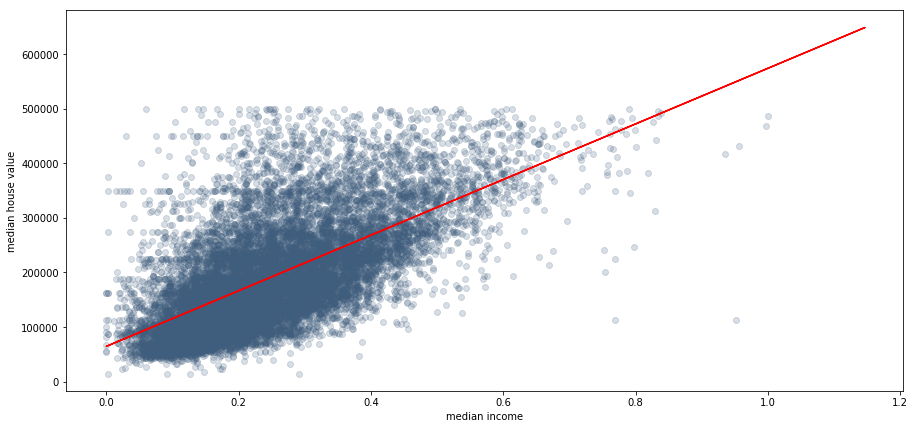

In [41]:
regressor.fit(X_train[:,[7]], y_train)
y_pred_med_inc = regressor.predict(X_test[:,[7]])

rmse_med_inc = np.sqrt(mean_squared_error(y_test , y_pred_med_inc))
cross_val__med_inc = cross_val_score(cv = 10,X = X_train[:,[7]], y = y_train, estimator = regressor, scoring = 'neg_mean_absolute_error')

print('Neg Mean Absolute Error: ' + str(cross_val__med_inc.mean()))

plt.figure(figsize=(15,7))
plt.scatter(X_train[:,7], y_train, color="#3F5D7D", alpha = 0.2)
plt.plot(X_test[:,7], regressor.predict(X_test[:,7:8]), color ='red')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

### 5.3 Polynomial Regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)

#Predicting the test set results
y_pred_poly = regressor_poly.predict(X_test_poly)

#Performing Cross Validation Scoring
cross_val_poly = cross_val_score(cv = 10,X = X_train_poly, y = y_train, estimator = regressor_poly, scoring = 'neg_mean_absolute_error')
print('Neg Mean Absolute Error: ' + str(cross_val_poly.mean()))


Neg Mean Absolute Error: -4374035241.393273


* The polynomial regression is suffering from very high variance when using all features to predict

**Taking only the 'median_income' in consideration (highest correlation)**

Neg Mean Absolute Error: -56673.8208777966


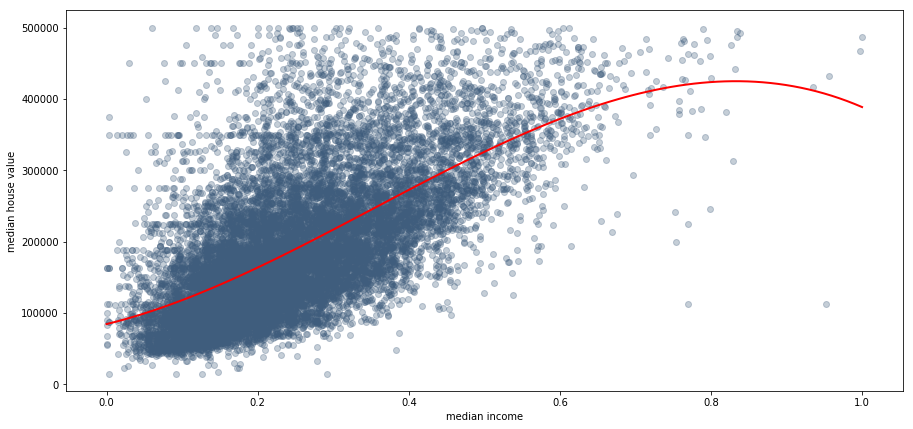

In [43]:
poly = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly.fit_transform(X_train[:,[7]])
X_test_poly = poly.fit_transform(X_test[:,[7]])

regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)

#Predicting the test set results
y_pred_poly = regressor_poly.predict(X_test_poly)

#Performing Cross Validation Scoring
cross_val_poly = cross_val_score(cv = 10,X = X_train_poly, y = y_train, estimator = regressor_poly, scoring = 'neg_mean_absolute_error')
print('Neg Mean Absolute Error: ' + str(cross_val_poly.mean()))

X_new = np.linspace(0, 1, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_new = regressor_poly.predict(X_new_poly)

plt.figure(figsize=(15,7))
plt.scatter(X_train[:,7], y_train, color="#3F5D7D", alpha = 0.3)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

* Using only the median_income we have a much better result, but the linear regression went better

### 5.4 Decision Tree

Neg Mean Absolute Error: -36548.33646206256


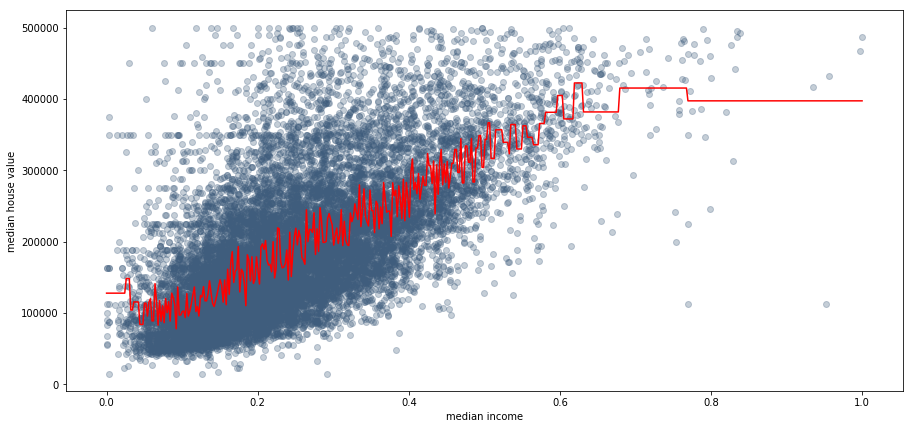

In [44]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=42, min_samples_leaf=25)
dec_tree_2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=25)
dec_tree.fit(X_train, y_train)
dec_tree_2.fit(X_train[:,[7]], y_train)

y_pred_dec_tree = dec_tree.predict(X_test)

#Performing Cross Validation Scoring
cross_val_dec_tree = cross_val_score(cv = 10,X = X_train, y = y_train, estimator = dec_tree, scoring = 'neg_mean_absolute_error')
print('Neg Mean Absolute Error: ' + str(cross_val_dec_tree.mean()))

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_1 = dec_tree_2.predict(x1)

plt.figure(figsize=(15,7))
plt.scatter(X_train[:,7], y_train, color="#3F5D7D", alpha = 0.3)
plt.plot(x1, y_1, color ='red',  )

plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

### 5.5 Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

#Performing grid search to find best parameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 90, 180], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_train, y_train);

In [46]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 180}

In [83]:
forest_reg = RandomForestRegressor(max_features = 6, n_estimators=180, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest_reg = forest_reg.predict(X_test)

#Performing Cross Validation Scoring
cross_val_forest_reg = cross_val_score(cv = 10,X = X_train, y = y_train, estimator = forest_reg, scoring = 'neg_mean_absolute_error')
print('Neg Mean Absolute Error: ' + str(cross_val_forest_reg.mean()))

Neg Mean Absolute Error: -29963.266644077376


**Taking only the 'median_income' in consideration (highest correlation)**

Neg Mean Absolute Error: -30895.25607157984


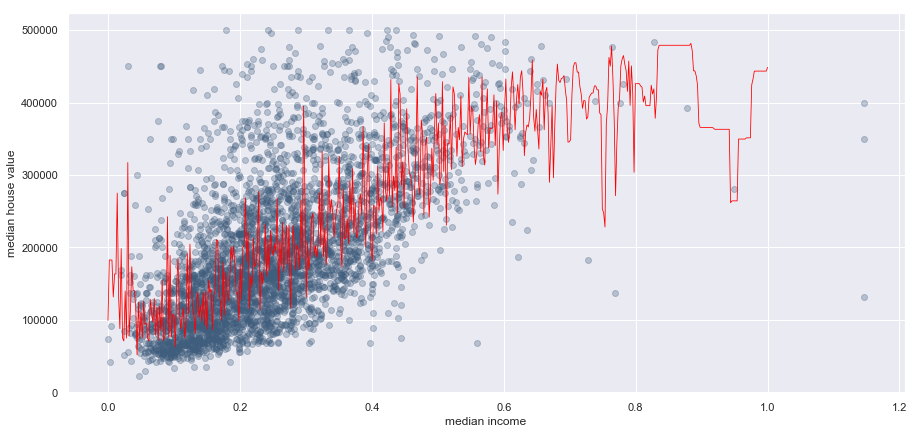

In [84]:
forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(X_train[:,[7]], y_train)
y_pred_forest_reg = forest_reg.predict(X_test[:,[7]])

#Performing Cross Validation Scoring
cross_val_forest_reg_2 = cross_val_score(cv = 10,X = X_train, y = y_train, estimator = forest_reg, scoring = 'neg_mean_absolute_error')
print('Neg Mean Absolute Error: ' + str(cross_val_forest_reg_2.mean()))

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_1 = forest_reg.predict(x1)

plt.figure(figsize=(15,7))
plt.scatter(X_test[:,7], y_test, color="#3F5D7D", alpha = 0.3)
plt.plot(x1, y_1, color ='red',linewidth=0.8)

plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

It's noticeable that the random forest regressor overfitted when using only one attribute, but this plot is interesting to visualize how the algorithm behaves.

### 5.6 SVR

In [49]:
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['linear','rbf'], 'C': [100, 1000, 10000, 100000, 150000, 200000], 'gamma':[0.15, 0.2, 0.25, 0.3, 0.35] }
      ]

svm_reg = SVR()

grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X_train, y_train);

In [50]:
grid_search.best_params_

{'C': 200000, 'gamma': 0.35, 'kernel': 'rbf'}

In [51]:
svm_reg = SVR(kernel = "rbf", C = 200000, epsilon = 2, gamma = 0.35)
svm_reg.fit(X_train, y_train)

y_pred_svr = svm_reg.predict(X_test)

#Performing Cross Validation Scoring
cross_val_svm_reg = cross_val_score(cv = 10,X = X_train, y = y_train, estimator = svm_reg, scoring = 'neg_mean_absolute_error')
print('Neg Mean Absolute Error: ' + str(cross_val_svm_reg.mean()))


Neg Mean Absolute Error: -39174.45630701315


Neg Mean Absolute Error: -55379.272821930426


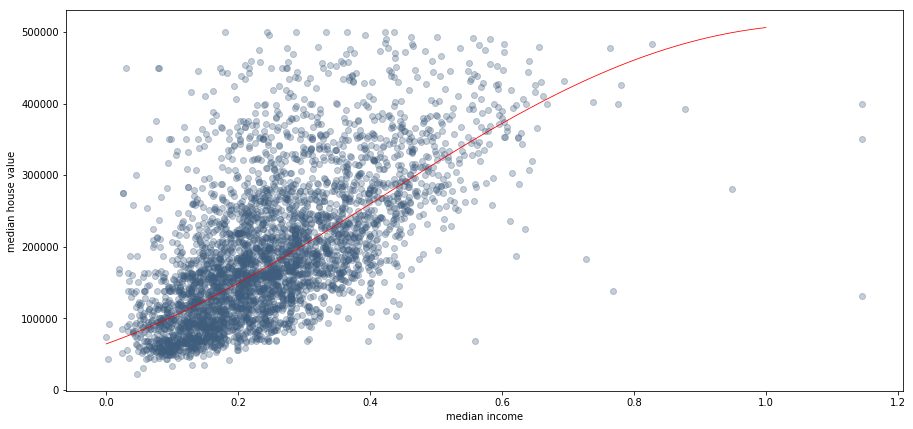

In [52]:
svm_reg = SVR(kernel="rbf", C=400000, epsilon=2, gamma = 0.7)
svm_reg.fit(X_train[:,[7]], y_train)

y_pred_svr = svm_reg.predict(X_test[:,[7]])

#Performing Cross Validation Scoring
cross_val_svm_reg = cross_val_score(cv = 10,X = X_train[:,[7]], y = y_train, estimator = svm_reg, scoring = 'neg_mean_absolute_error')
print('Neg Mean Absolute Error: ' + str(cross_val_svm_reg.mean()))



x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_1 = svm_reg.predict(x1)

plt.figure(figsize=(15,7))
plt.scatter(X_test[:,7], y_test, color="#3F5D7D", alpha = 0.3)
plt.plot(x1, y_1, color ='red',linewidth=0.8)

plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

## 6. Models Comparison

Here are the scores from each algorithm again:

In [85]:
d = {'Linear Reg': [(-1)*r2_lr, (-1)*std_lr],
    'Neural Network': [(-1)*cross_val_dec_tree.mean(), (-1)*cross_val_dec_tree.std()],
    #'Polynomial Reg': [cross_val_poly.mean(), cross_val_poly.std()],
    'Decision Tree Reg': [(-1)*cross_val_dec_tree.mean(), (-1)*cross_val_dec_tree.std()],
    'Random Forest Reg': [(-1)*cross_val_forest_reg.mean(), (-1)*cross_val_forest_reg.std()],
    'SVR': [(-1)*cross_val_svm_reg.mean(), (-1)*cross_val_svm_reg.std()]
    }
scores = pd.DataFrame(d, index = ['MAE', 'Std'])
scores

,Linear Reg,Neural Network,Decision Tree Reg,Random Forest Reg,SVR
MAE,44335.473478,36548.336462,36548.336462,29963.266644,55379.272822
Std,-1027.479489,-727.154871,-727.154871,-934.857640,-1274.131793


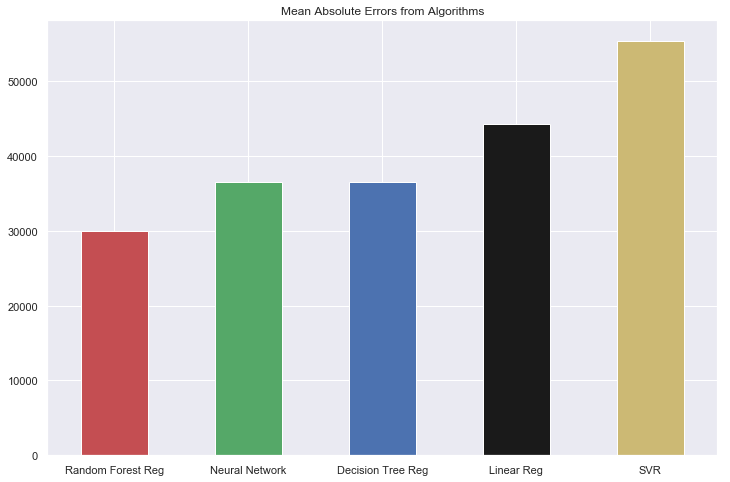

In [86]:
sns.set()
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c'] 
scores.sort_values('MAE', ascending=True, inplace = True, axis = 1)
scores.loc['MAE',:].plot(
    kind = 'bar', 
    color = my_colors,
    figsize=(12,8),
    
    )
plt.xticks(rotation=0)
plt.title('Mean Absolute Errors from Algorithms')
plt.show()

With a MAE of 29963, the best model found here was the Random Forest Regression using 6 features 180 estimators. Considering the price goes from 15000 to 500000, giving a range of 485000, a mean absolute error of 29963 seems reasonable. 